In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

## Задание 1

Давайте продолжим искать переменные, которые разделяют факт ухода клиента. Посмотрим, влияет ли флаг пенсионера на вероятность оттока. Постройте диаграмму, которая могла бы ответить на этот вопрос.

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
pivot_table = pd.pivot_table(df,
                             index='SeniorCitizen',
                             columns='Churn',
                             values='customerID',
                             aggfunc='count',
                             fill_value=0)
pivot_table

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


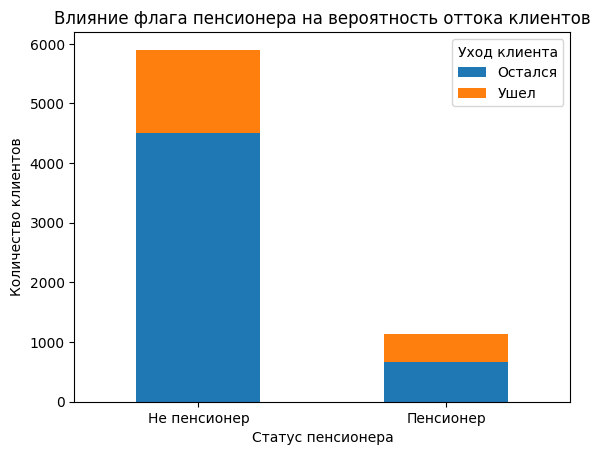

In [13]:
pivot_table.plot(kind='bar', stacked=True)
plt.title('Влияние флага пенсионера на вероятность оттока клиентов')
plt.xlabel('Статус пенсионера')
plt.ylabel('Количество клиентов')
plt.xticks(ticks=[0, 1], labels=['Не пенсионер', 'Пенсионер'], rotation=0)
plt.legend(title='Уход клиента', labels=['Остался', 'Ушел'])
plt.show()

## Задание 2

Если у клиента подключен интернет, то ему доступны 6 дополнительных услуг, а именно: онлайн защита, онлайновое резервное копирование, защита устройства, наличие ТВ, наличие доступа к фильмам. Скорее всего, чтобы удержать клиента нам выгодно по-максимуму погружать его в нашу экосистему. Давайте посмотрим, зависит ли % оттекших клиентов от кол-ва услуг, которые у них были подключены (по клиентам, у кого подключен интернет) ? Одинаковая ли зависимость на разных типах интернета? Подберите тип визуализации и постройте график\диаграмму, который смог бы ответить на эти вопросы.

In [14]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [17]:
df['num_services'] = (
    df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'DeviceProtection',
                        'StreamingTV', 'StreamingMovies']].sum(axis=1)
)


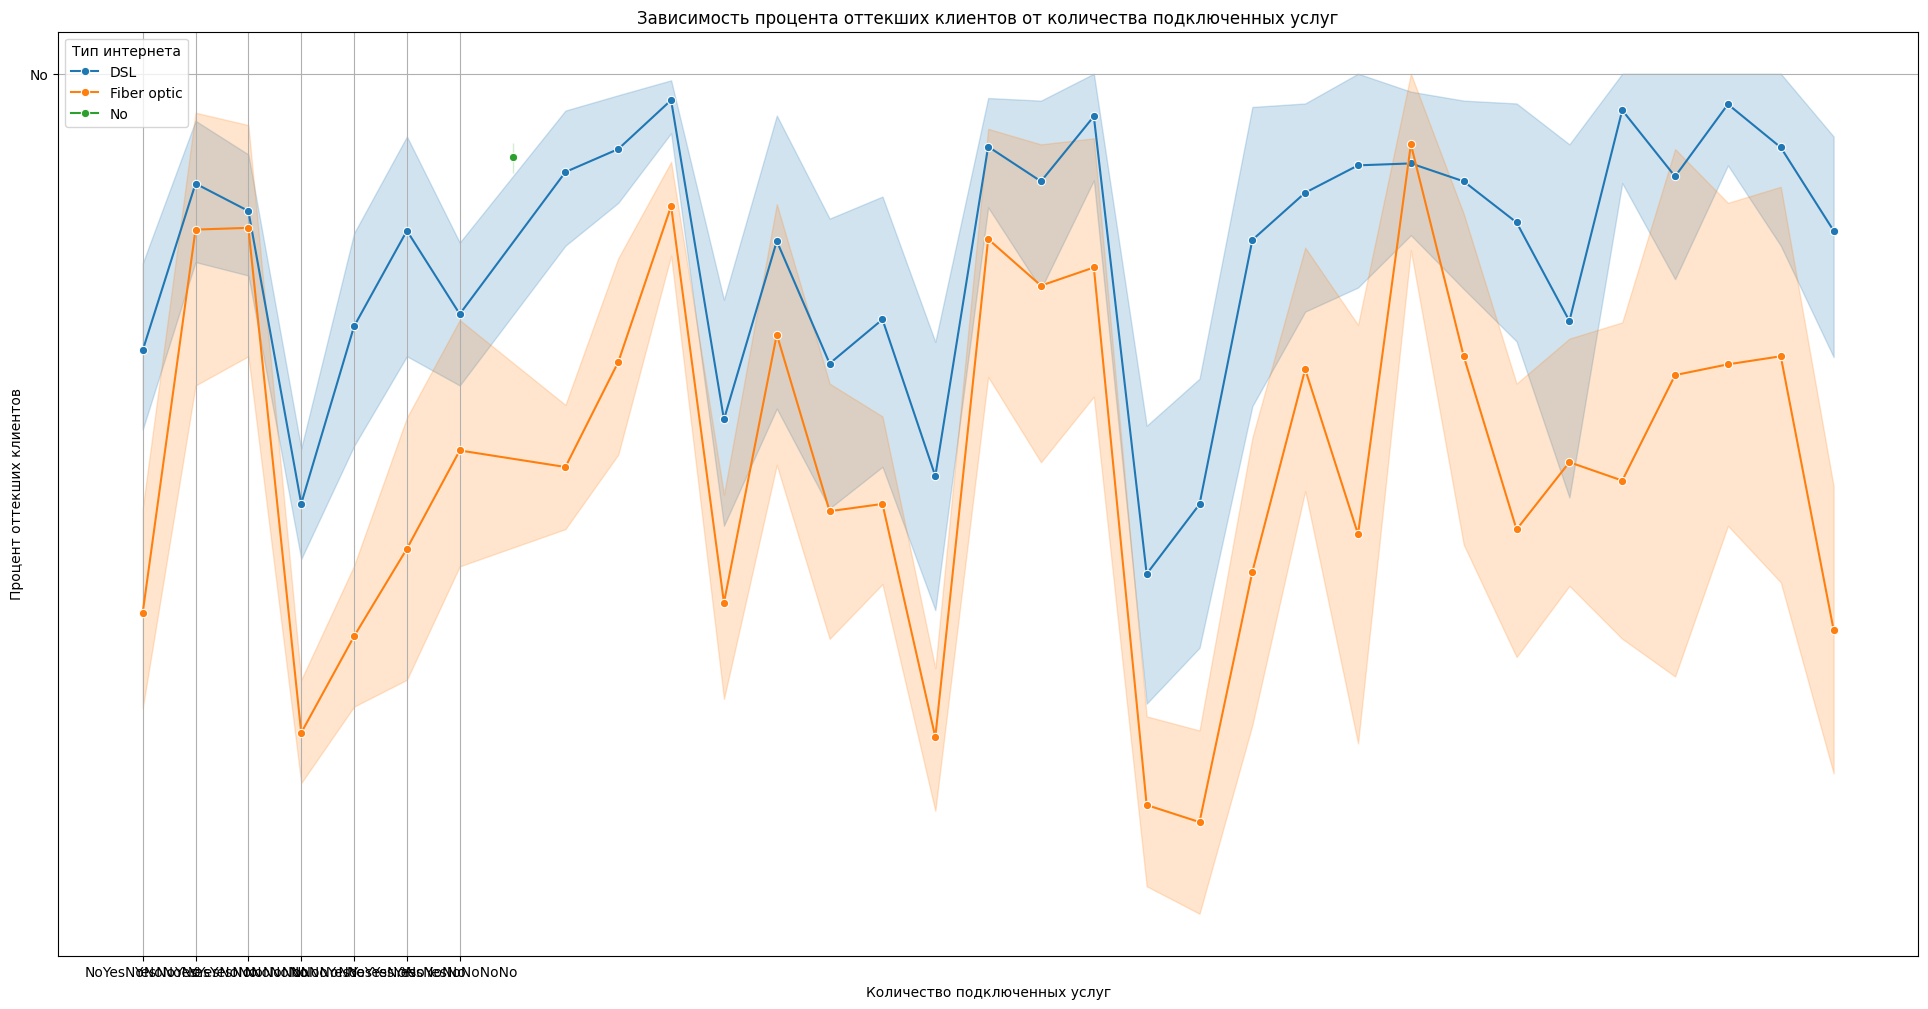

In [23]:
plt.figure(figsize=(24, 12))
sns.lineplot(data=df, x='num_services', y='Churn', hue='InternetService', marker='o')
plt.title('Зависимость процента оттекших клиентов от количества подключенных услуг')
plt.xlabel('Количество подключенных услуг')
plt.ylabel('Процент оттекших клиентов')
plt.xticks(range(0, 7))  # от 0 до 6 услуг
plt.legend(title='Тип интернета')
plt.grid()
plt.show()